<a href="https://colab.research.google.com/github/primaa28/Movie-Recommendation-system/blob/master/Movie_Recommendation_System_Using_by_KNN_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
movies_def= pd.read_csv('movies.csv', error_bad_lines=False, encoding='latin-1')
movies_def.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies_def.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [ ]:
movies_def=movies_def[['movieId','title']]
movies_def.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
movies_def.rename(columns={'movieId':'movie_id'},inplace=True)
movies_def.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
ratings_def= pd.read_csv('ratings.csv', error_bad_lines=False, encoding='latin-1')
ratings_def.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings_def.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
ratings_def.rename(columns={'userId':'user_id', 'movieId':'movie_id'},inplace=True)
ratings_def.head()

,user_id,movie_id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies_def.shape

(9742, 2)

In [ ]:
ratings_def.shape

(100836, 4)

In [ ]:
ratings_def['user_id'].value_counts() 

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
406      20
595      20
569      20
431      20
442      20
Name: user_id, Length: 610, dtype: int64

In [ ]:
ratings_def['user_id'].value_counts().shape 

(610,)

In [ ]:
x=ratings_def['user_id'].value_counts()>200
x[x]

414    True
599    True
474    True
448    True
274    True
       ... 
220    True
246    True
452    True
234    True
385    True
Name: user_id, Length: 133, dtype: bool

In [ ]:
x[x].shape

(133,)

In [ ]:
y=x[x].index
y

Int64Index([414, 599, 474, 448, 274, 610,  68, 380, 606, 288,
            ...
            119, 563, 263,  73, 586, 220, 246, 452, 234, 385],
           dtype='int64', length=133)

In [ ]:
ratings_def=ratings_def[ratings_def['user_id'].isin(y )]

In [ ]:
ratings_def.shape

(68284, 4)

In [ ]:
ratings_def.head()

,user_id,movie_id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings_def_with_movies_def=ratings_def.merge(movies_def,on='movie_id')

ratings_def_with_movies_def

,user_id,movie_id,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,18,1,3.5,1455209816,Toy Story (1995)
2,19,1,4.0,965705637,Toy Story (1995)
3,21,1,3.5,1407618878,Toy Story (1995)
4,45,1,4.0,951170182,Toy Story (1995)
...,...,...,...,...,...
68279,610,160341,2.5,1479545749,Bloodmoon (1997)
68280,610,160527,4.5,1479544998,Sympathy for the Underdog (1971)
68281,610,160836,3.0,1493844794,Hazard (2005)
68282,610,163937,3.5,1493848789,Blair Witch (2016)


In [ ]:
ratings_def_with_movies_def.shape

(68284, 5)

In [ ]:
number_rating=ratings_def_with_movies_def.groupby('title')['rating'].count().reset_index()

In [ ]:
number_rating.rename(columns={'rating':'Number of ratings'},inplace=True)
number_rating

,title,Number of ratings
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),1
3,'Tis the Season for Love (2015),1
4,"'burbs, The (1989)",12
...,...,...
9259,[REC]Â³ 3 GÃ©nesis (2012),2
9260,eXistenZ (1999),17
9261,xXx (2002),20
9262,xXx: State of the Union (2005),5


In [ ]:
df1=ratings_def_with_movies_def.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head()

,rating
title,
Forrest Gump (1994),480.5
"Matrix, The (1999)",469.5
Star Wars: Episode IV - A New Hope (1977),468.5
Star Wars: Episode V - The Empire Strikes Back (1980),462.0
Pulp Fiction (1994),454.5


In [ ]:
! pip install matplotlib
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


Defaulting to user installation because normal site-packages is not writeable


<BarContainer object of 20 artists>

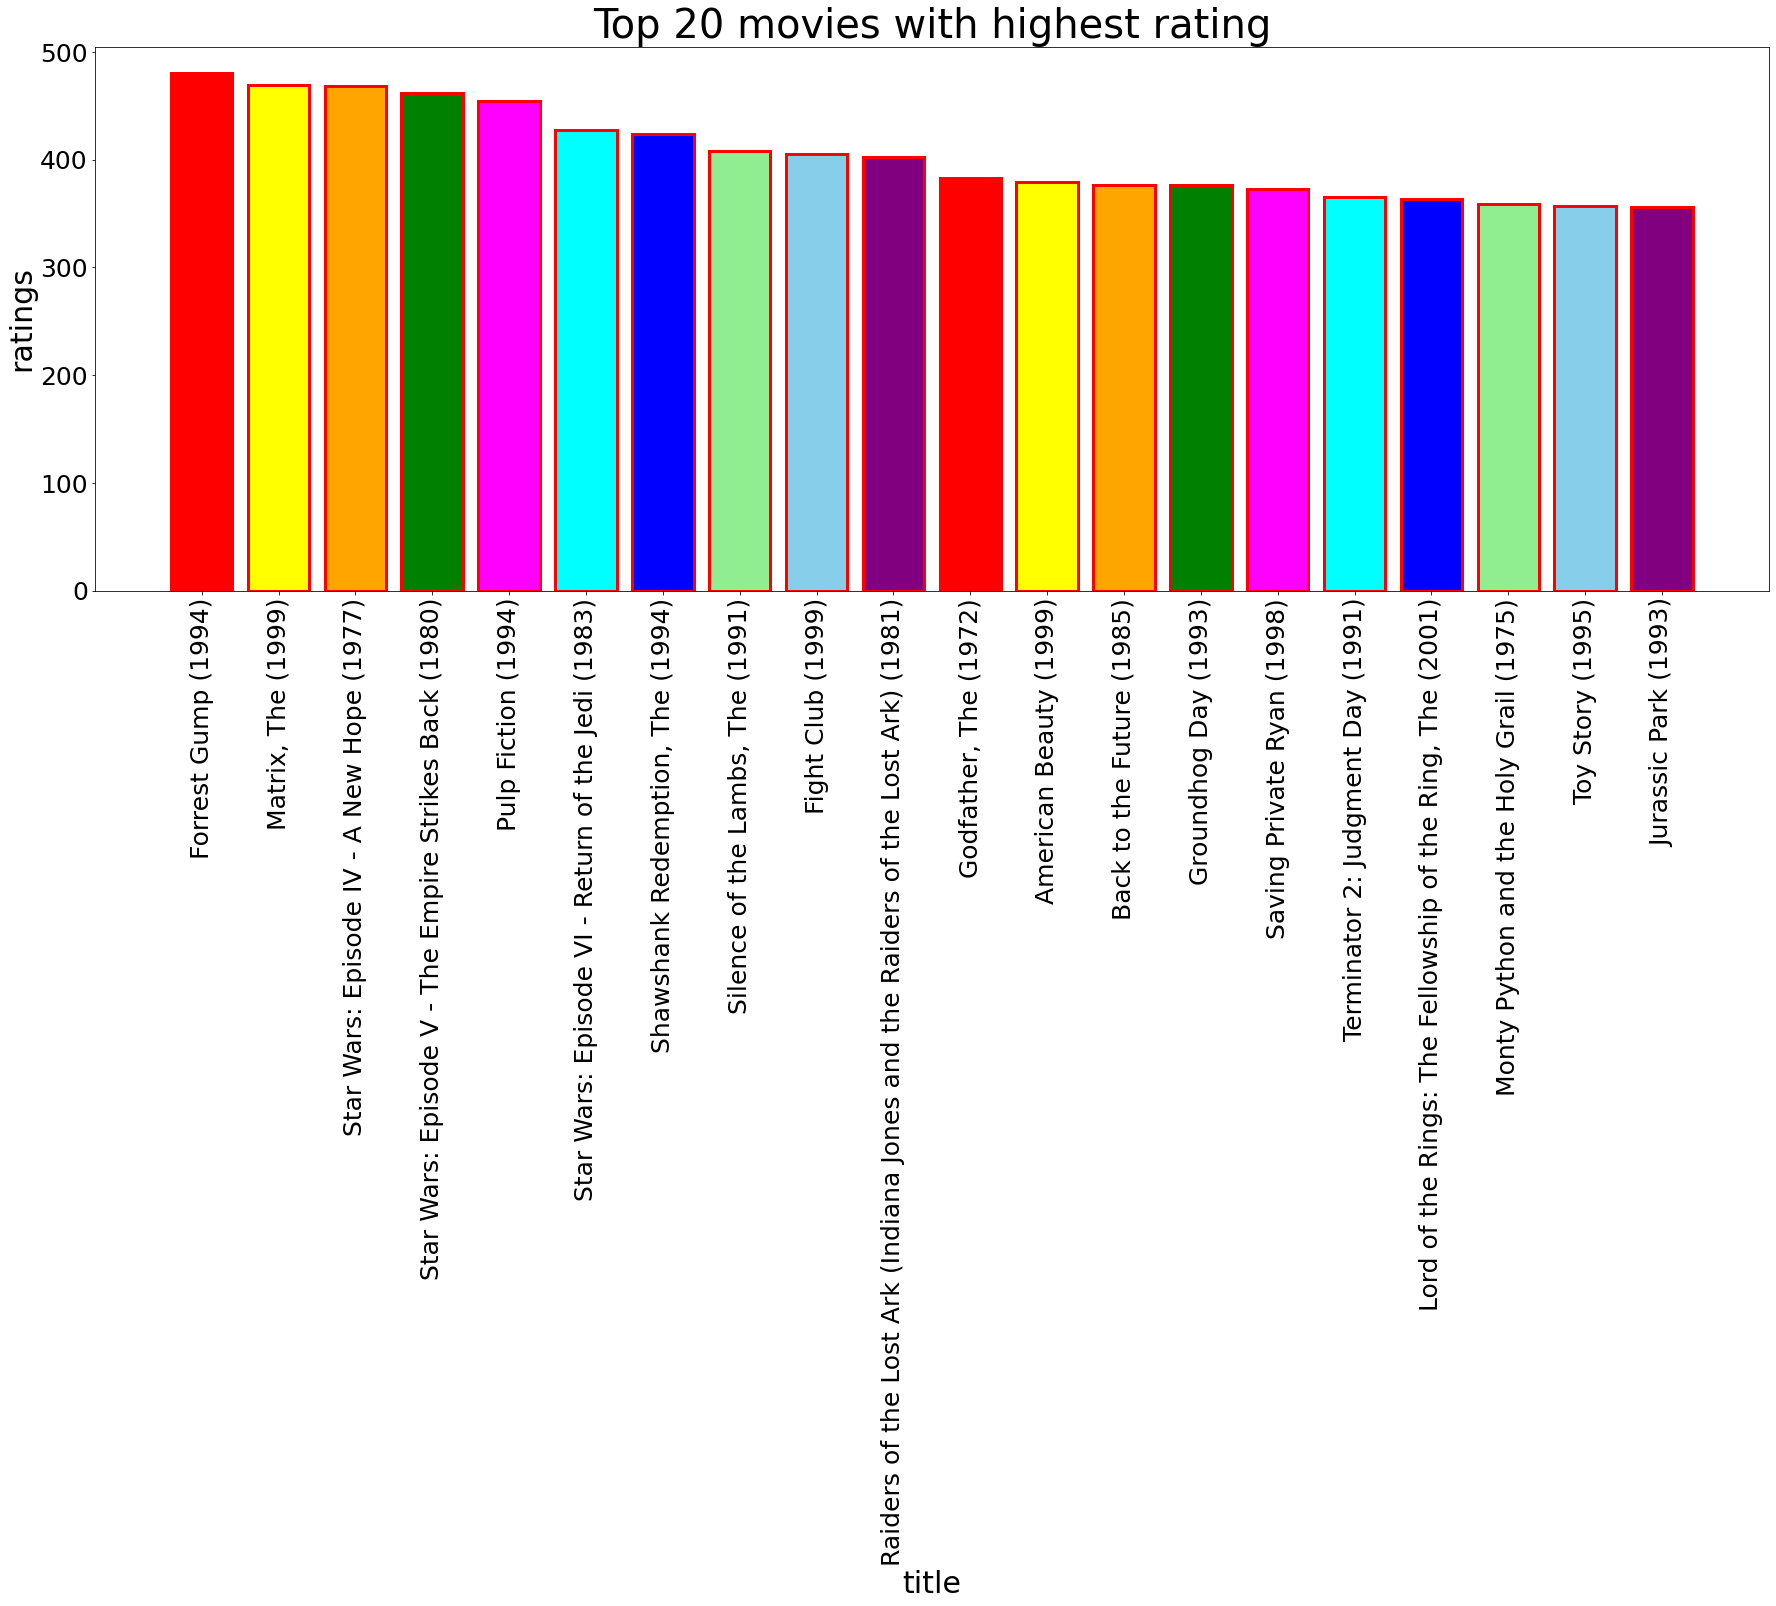

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)

In [ ]:
df2=ratings_def_with_movies_def.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Forrest Gump (1994),119
"Matrix, The (1999)",113
Star Wars: Episode IV - A New Hope (1977),111
Star Wars: Episode V - The Empire Strikes Back (1980),107
Pulp Fiction (1994),105


<BarContainer object of 20 artists>

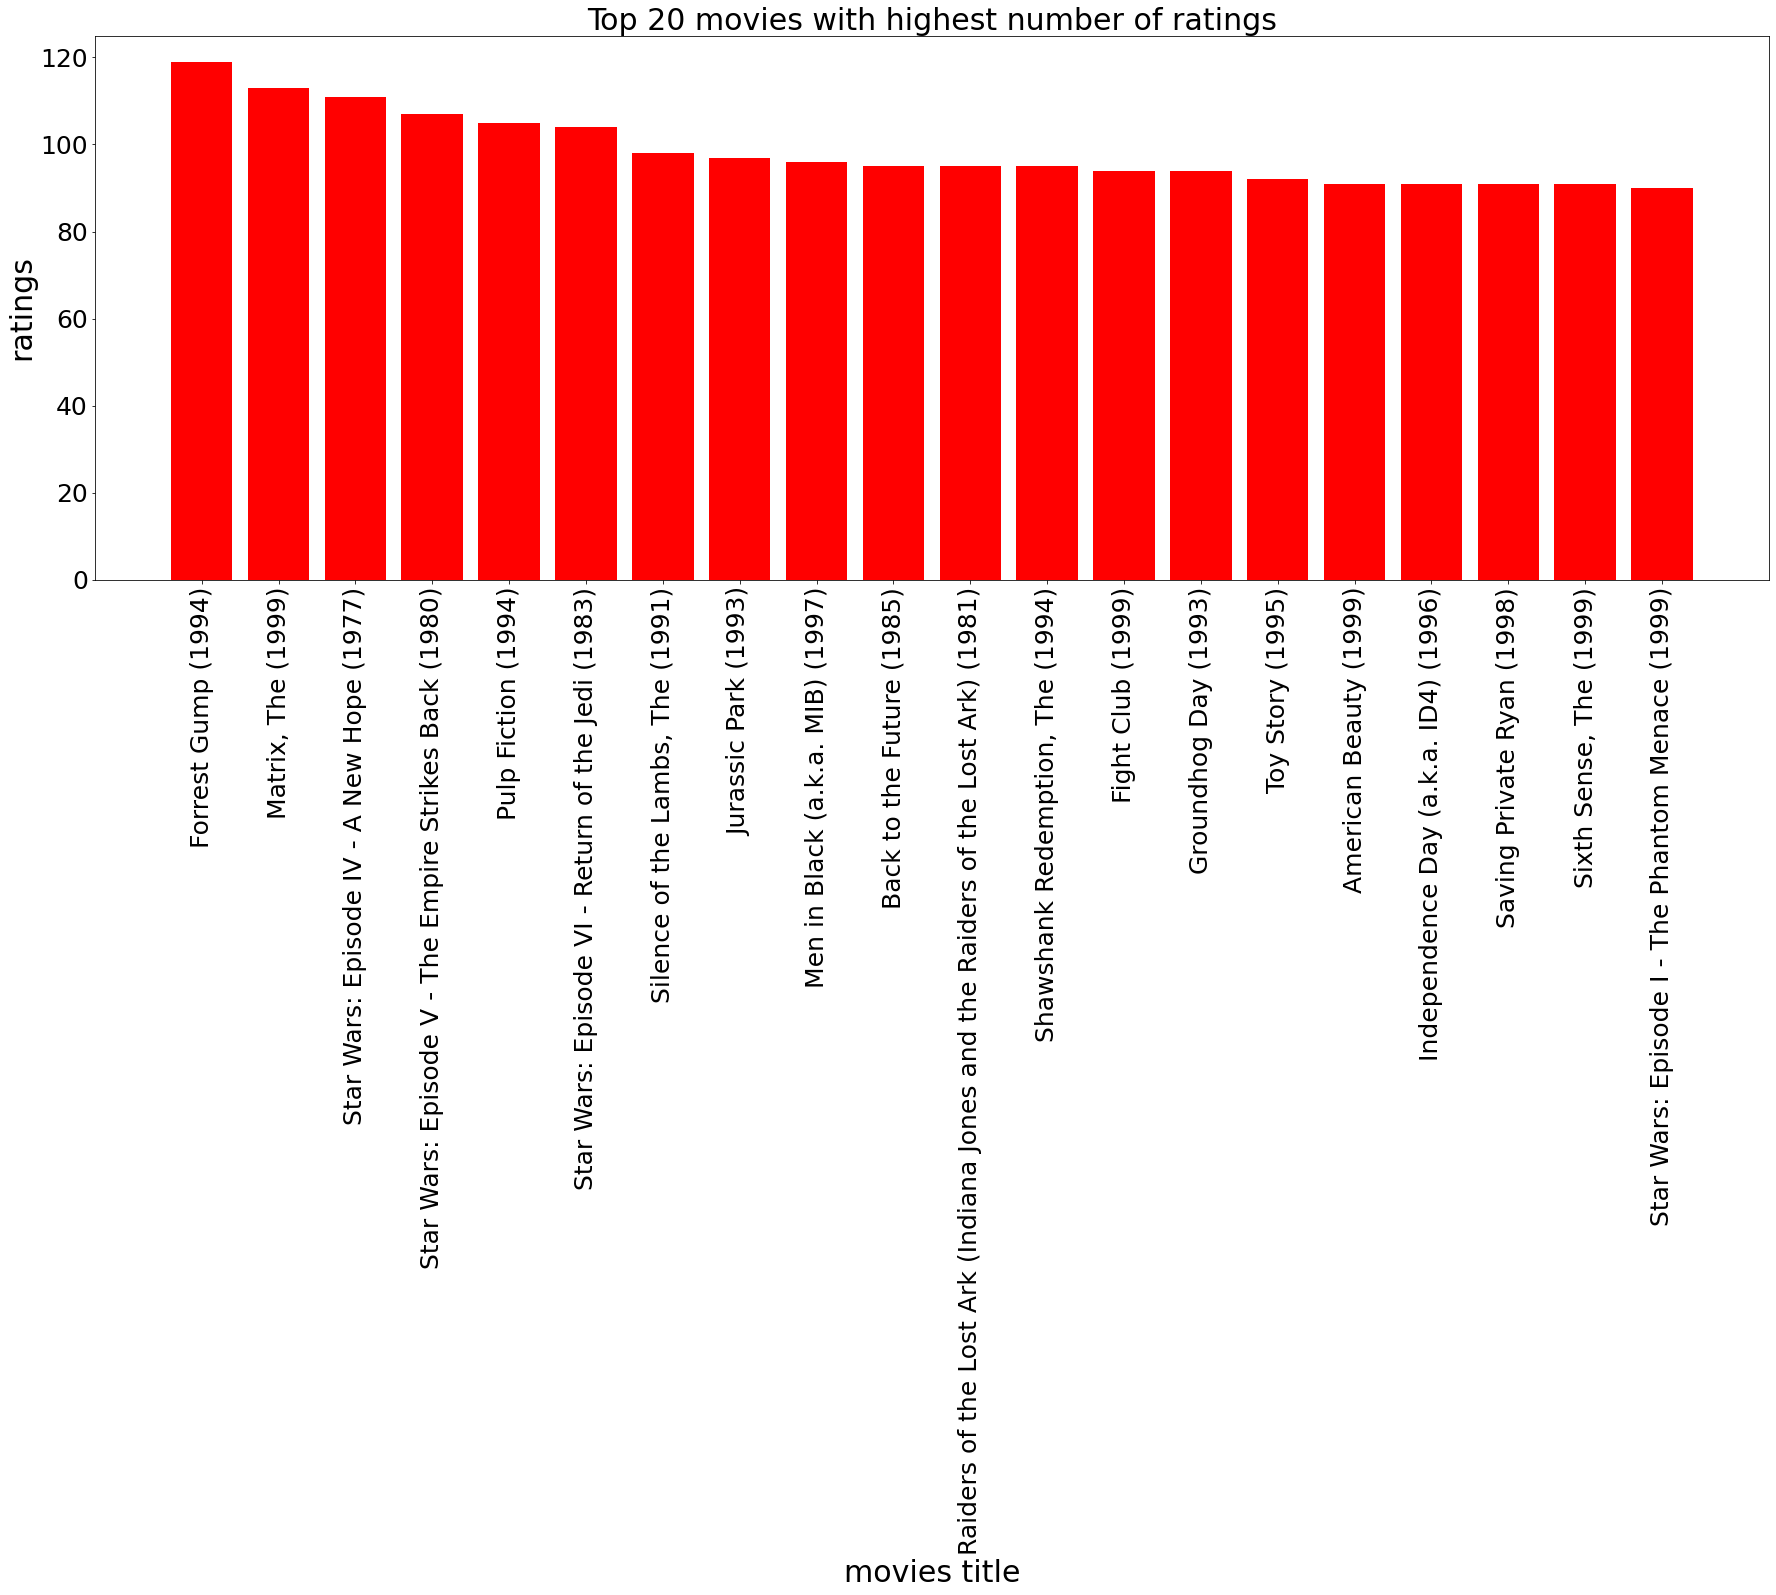

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red')

In [ ]:
final_rating=ratings_def_with_movies_def.merge(number_rating,on='title')

In [ ]:
final_rating.shape

(68284, 6)

In [ ]:
final_rating=final_rating[final_rating['Number of ratings']>=50]
final_rating.shape

(13839, 6)

In [ ]:
final_rating.drop_duplicates(['user_id','title'],inplace=True)
final_rating.shape

(13839, 6)

In [ ]:
movies_def_pivot=final_rating.pivot_table(columns='user_id',index='movie_id',values='rating')

In [ ]:
movies_def_pivot

user_id,1,4,6,18,19,20,21,28,41,42,...,594,596,597,599,600,603,605,606,608,610
movie_id,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,3.5,4.0,NaN,3.5,NaN,NaN,NaN,...,NaN,4.0,4.0,3.0,2.5,4.0,4.0,2.5,2.5,5.0
2,NaN,NaN,4.0,3.0,3.0,3.0,3.5,NaN,NaN,NaN,...,4.0,NaN,NaN,2.5,4.0,NaN,3.5,NaN,2.0,NaN
6,4.0,NaN,4.0,4.0,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,3.0,4.5,NaN,4.0,NaN,NaN,NaN,5.0
10,NaN,NaN,3.0,NaN,2.0,NaN,5.0,NaN,NaN,5.0,...,NaN,NaN,3.0,3.5,NaN,NaN,NaN,NaN,4.0,NaN
32,NaN,2.0,4.0,4.0,4.0,NaN,NaN,3.5,NaN,NaN,...,NaN,3.5,NaN,3.0,4.5,3.0,NaN,4.0,3.5,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,4.5,NaN,4.0,NaN,NaN,NaN,4.0,NaN,4.5
68954,NaN,NaN,NaN,4.0,NaN,NaN,4.5,NaN,4.0,NaN,...,NaN,3.5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.5
69122,NaN,NaN,NaN,3.0,NaN,NaN,3.5,NaN,3.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0


In [ ]:
movies_def_pivot.shape

(205, 133)

In [ ]:
movies_def_pivot.fillna(0,inplace=True)
movies_def_pivot.head()


user_id,1,4,6,18,19,20,21,28,41,42,...,594,596,597,599,600,603,605,606,608,610
movie_id,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,3.5,4.0,0.0,3.5,0.0,0.0,0.0,...,0.0,4.0,4.0,3.0,2.5,4.0,4.0,2.5,2.5,5.0
2,0.0,0.0,4.0,3.0,3.0,3.0,3.5,0.0,0.0,0.0,...,4.0,0.0,0.0,2.5,4.0,0.0,3.5,0.0,2.0,0.0
6,4.0,0.0,4.0,4.0,0.0,0.0,0.0,3.5,0.0,0.0,...,0.0,0.0,3.0,4.5,0.0,4.0,0.0,0.0,0.0,5.0
10,0.0,0.0,3.0,0.0,2.0,0.0,5.0,0.0,0.0,5.0,...,0.0,0.0,3.0,3.5,0.0,0.0,0.0,0.0,4.0,0.0
32,0.0,2.0,4.0,4.0,4.0,0.0,0.0,3.5,0.0,0.0,...,0.0,3.5,0.0,3.0,4.5,3.0,0.0,4.0,3.5,4.5


In [ ]:
movies_def_pivot=final_rating.pivot_table(columns='title',index='user_id',values='rating')
movies_def_pivot

title,2001: A Space Odyssey (1968),300 (2007),Ace Ventura: Pet Detective (1994),Airplane! (1980),Aladdin (1992),Alien (1979),Aliens (1986),Almost Famous (2000),"Amelie (Fabuleux destin d'AmÃ©lie Poulain, Le) (2001)",American Beauty (1999),...,Up (2009),"Usual Suspects, The (1995)",V for Vendetta (2006),WALLÂ·E (2008),When Harry Met Sally... (1989),Who Framed Roger Rabbit? (1988),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)",X-Men (2000),X2: X-Men United (2003)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,...,NaN,5.0,NaN,NaN,NaN,5.0,5.0,5.0,5.0,NaN
4,NaN,NaN,NaN,5.0,4.0,NaN,NaN,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN
6,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
18,4.0,3.5,2.5,NaN,3.5,4.0,NaN,NaN,4.0,NaN,...,4.0,5.0,4.5,NaN,NaN,NaN,NaN,4.0,4.0,4.0
19,3.0,NaN,2.0,2.0,3.0,4.0,3.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,3.0,5.0,4.0,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,5.0,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,4.0,3.0,3.0,5.0,NaN,NaN
605,NaN,3.0,NaN,5.0,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,NaN
606,5.0,NaN,NaN,NaN,NaN,4.0,3.5,3.5,4.5,4.5,...,NaN,4.5,NaN,4.0,4.5,3.0,NaN,NaN,NaN,NaN


In [ ]:
movies_def_pivot.shape

(133, 205)

In [ ]:
movies_def_pivot.fillna(0,inplace=True)
movies_def_pivot.head()

title,2001: A Space Odyssey (1968),300 (2007),Ace Ventura: Pet Detective (1994),Airplane! (1980),Aladdin (1992),Alien (1979),Aliens (1986),Almost Famous (2000),"Amelie (Fabuleux destin d'AmÃ©lie Poulain, Le) (2001)",American Beauty (1999),...,Up (2009),"Usual Suspects, The (1995)",V for Vendetta (2006),WALLÂ·E (2008),When Harry Met Sally... (1989),Who Framed Roger Rabbit? (1988),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)",X-Men (2000),X2: X-Men United (2003)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,...,0.0,5.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0
4,0.0,0.0,0.0,5.0,4.0,0.0,0.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0
6,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
18,4.0,3.5,2.5,0.0,3.5,4.0,0.0,0.0,4.0,0.0,...,4.0,5.0,4.5,0.0,0.0,0.0,0.0,4.0,4.0,4.0
19,3.0,0.0,2.0,2.0,3.0,4.0,3.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,3.0,5.0,4.0,0.0,4.0,0.0


In [ ]:
#KNN Algorithm
from scipy.sparse import csr_matrix


In [ ]:
#Spare Matrix
#         Users
#        [4,4,5] A
#Movies  [3,3,4] B ==   Cos(A,B) => 0.95 
#       [3,2,1]

mat_movies_def_pivot=csr_matrix(movies_def_pivot.values)



In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
# Euclidean Distance
# Manhattan Distance
# Minkowski Distance 
# Cosine Similarity
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
model_knn.fit(mat_movies_def_pivot)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import process


Defaulting to user installation because normal site-packages is not writeable


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# Recommender(movie_name) => List of Movies recommended

def recommender(movie_name, data,model, n_recommendations ):
    model.fit(data)
    idx=process.extractOne(movie_name, movies_def['title'])[2]
    print('Movie Selected: ',movies_def['title'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)
    for i in indices:
        print(movies_def['title'][i].where(i!=idx))
    
recommender('batman', mat_movies_def_pivot, model_knn,20)

    

Movie Selected:  Batman Forever (1995) Index:  126
Searching for recommendations.....
126                                                  NaN
90                                      Mr. Wrong (1996)
58                                       Bio-Dome (1996)
103                                  If Lucy Fell (1996)
101                         Anne Frank Remembered (1995)
23                                         Powder (1995)
18                 Ace Ventura: When Nature Calls (1995)
122                                       Amateur (1994)
131                                        Casper (1995)
96                                        Catwalk (1996)
84                                   Broken Arrow (1996)
88                                      City Hall (1996)
38                                Dead Presidents (1995)
61                                         Friday (1995)
68                                      Screamers (1995)
104                       Steal Big, Steal Little (1995)
74

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [ ]:
ratings_def_with_movies_def.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
The Adventures of Sherlock Holmes and Doctor Watson    5.0
Justice League: Doom (2012)                            5.0
Oscar (1967)                                           5.0
Karlson Returns (1970)                                 5.0
Vovka in the Kingdom of Far Far Away (1965)            5.0
Name: rating, dtype: float64

In [ ]:
pro = ratings_def_with_movies_def.groupby('title')['rating'].mean().sort_values(ascending=False).head()
pro2 = pd.DataFrame(pro,columns=['rating'])

In [ ]:
pro2.columns

Index(['rating'], dtype='object')

In [ ]:
ratings_def_with_movies_def.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                                      119
Matrix, The (1999)                                       113
Star Wars: Episode IV - A New Hope (1977)                111
Star Wars: Episode V - The Empire Strikes Back (1980)    107
Pulp Fiction (1994)                                      105
Name: rating, dtype: int64

In [ ]:
ratings = pd.DataFrame(ratings_def_with_movies_def.groupby('title')['rating'].mean())
ratings.head(100)

,rating
title,
'71 (2014),4.000
'Hellboy': The Seeds of Creation (2004),4.000
'Round Midnight (1986),3.500
'Tis the Season for Love (2015),1.500
"'burbs, The (1989)",2.875
...,...
300: Rise of an Empire (2014),2.125
31 (2016),3.500
35 Up (1991),4.000


In [ ]:
ratings['num of ratings'] = pd.DataFrame(ratings_def_with_movies_def.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.000,1
'Hellboy': The Seeds of Creation (2004),4.000,1
'Round Midnight (1986),3.500,1
'Tis the Season for Love (2015),1.500,1
"'burbs, The (1989)",2.875,12


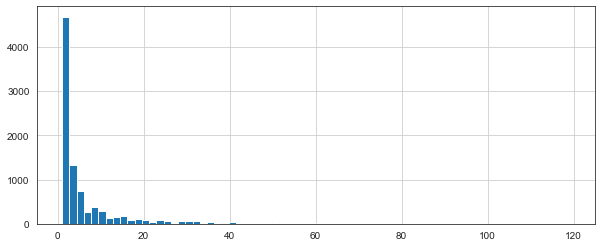

In [ ]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

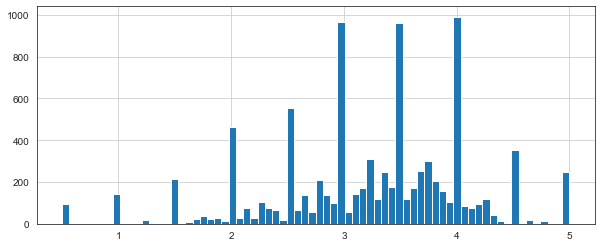

In [ ]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

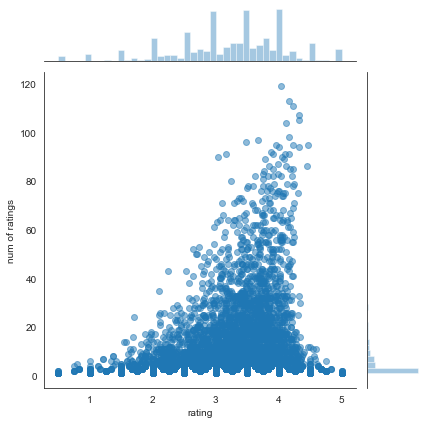

In [ ]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)